<a href="https://colab.research.google.com/github/yasservision24/Diagnosis-of-Diabetic-Retinopathy-using-CNN/blob/main/Diagnosis_of_Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d pkdarabi/diagnosis-of-diabetic-retinopathy

 34% 5.00M/14.9M [00:00<00:00, 52.0MB/s]
100% 14.9M/14.9M [00:00<00:00, 101MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/diagnosis-of-diabetic-retinopathy.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/valid',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 2076 files belonging to 2 classes.
Found 531 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
65/65 [==============================] - 19s 145ms/step - loss: 3.0386 - accuracy: 0.8603 - val_loss: 8.6510 - val_accuracy: 0.4614
Epoch 2/10
65/65 [==============================] - 7s 109ms/step - loss: 0.9557 - accuracy: 0.8873 - val_loss: 17.7310 - val_accuracy: 0.4614
Epoch 3/10
65/65 [==============================] - 7s 109ms/step - loss: 0.7656 - accuracy: 0.8935 - val_loss: 8.4768 - val_accuracy: 0.4614
Epoch 4/10
65/65 [==============================] - 7s 106ms/step - loss: 0.4858 - accuracy: 0.8945 - val_loss: 1.3456 - val_accuracy: 0.4614
Epoch 5/10
65/65 [==============================] - 7s 106ms/step - loss: 0.3904 - accuracy: 0.8916 - val_loss: 0.6275 - val_accuracy: 0.5951
Epoch 6/10
65/65 [==============================] - 7s 99ms/step - loss: 0.2972 - accuracy: 0.9133 - val_loss: 0.6277 - val_accuracy: 0.6422
Epoch 7/10
65/65 [==============================] - 7s 106ms/step - loss: 0.3902 - accuracy: 0.9046 - val_loss: 1.2913 - val_accuracy: 0.4934
Epoch

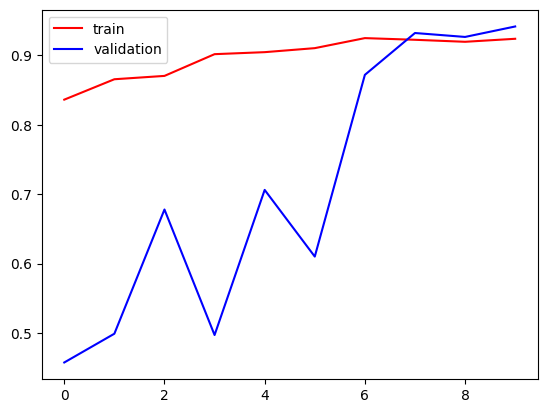

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

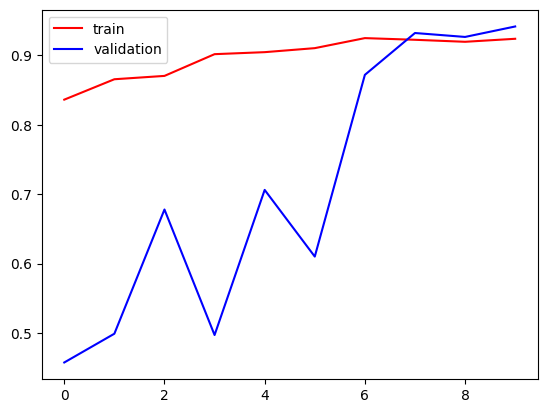

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

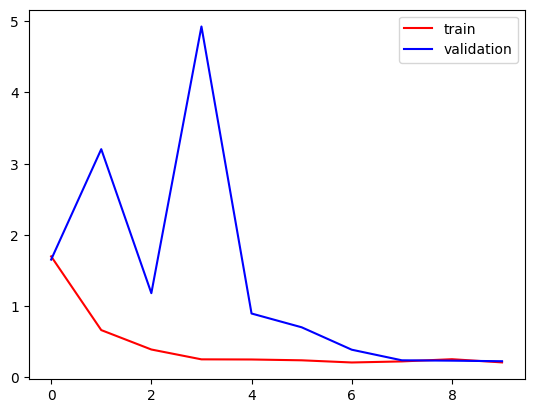

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

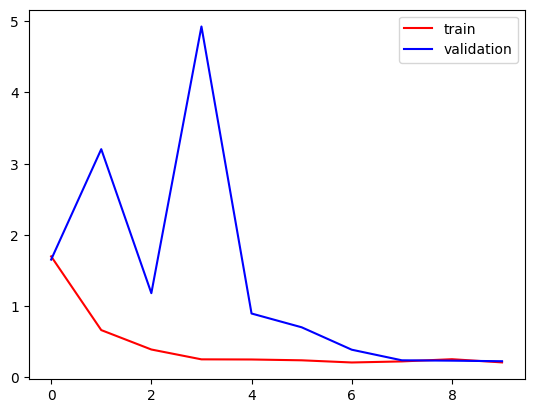

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()